In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('iris.csv')
df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.index
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

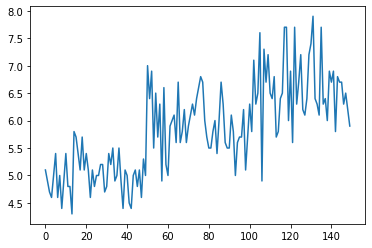

In [14]:
plt.plot(df['sepal.length'])

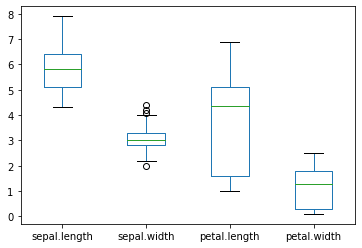

In [16]:
df.plot(kind = 'box')

In [31]:
# removing outliers
std_ = np.std(df['sepal.width'])
mean_ = np.mean(df['sepal.width'])
res = std_ + mean_
res2 = mean_ - std_
sepal_width = df['sepal.width'].values
for i in sepal_width:
    if i > res+0.5 or i < res2-0.5:
        print(f"outlier {i}")
    else:
        print(i)
        

3.5
3.0
3.2
3.1
3.6
3.9
3.4
3.4
2.9
3.1
3.7
3.4
3.0
3.0
outlier 4.0
outlier 4.4
3.9
3.5
3.8
3.8
3.4
3.7
3.6
3.3
3.4
3.0
3.4
3.5
3.4
3.2
3.1
3.4
outlier 4.1
outlier 4.2
3.1
3.2
3.5
3.6
3.0
3.4
3.5
2.3
3.2
3.5
3.8
3.0
3.8
3.2
3.7
3.3
3.2
3.2
3.1
2.3
2.8
2.8
3.3
2.4
2.9
2.7
outlier 2.0
3.0
2.2
2.9
2.9
3.1
3.0
2.7
2.2
2.5
3.2
2.8
2.5
2.8
2.9
3.0
2.8
3.0
2.9
2.6
2.4
2.4
2.7
2.7
3.0
3.4
3.1
2.3
3.0
2.5
2.6
3.0
2.6
2.3
2.7
3.0
2.9
2.9
2.5
2.8
3.3
2.7
3.0
2.9
3.0
3.0
2.5
2.9
2.5
3.6
3.2
2.7
3.0
2.5
2.8
3.2
3.0
3.8
2.6
2.2
3.2
2.8
2.8
2.7
3.3
3.2
2.8
3.0
2.8
3.0
2.8
3.8
2.8
2.8
2.6
3.0
3.4
3.1
3.0
3.1
3.1
3.1
2.7
3.2
3.3
3.0
2.5
3.0
3.4
3.0


In [33]:
# data cleansing
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [38]:
# now apply data modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [58]:
features = df.iloc[:,0:-1].values
features
target = df.iloc[:,-1].values
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2,random_state = 0)


In [82]:
# logistics regression , a classification algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
# print(X_test)
y_predict = classifier.predict(X_test)
y_predict
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
print(f"Accuracy Score {accuracy_score(y_predict,Y_test)}")


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score 0.9666666666666667


C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [81]:
# Support Vector Machine
from sklearn.svm import SVC
classifier2 = SVC()
classifier2.fit(X_train,Y_train)
# print(X_test)
y_predict = classifier2.predict(X_test)
print(confusion_matrix(Y_test,y_predict))   # best result
print(classification_report(Y_test,y_predict)) # best results
print(classifier2.predict([[5.1,3.5,1.4,0.2]])) #best results
print(f"Accuracy Score {accuracy_score(y_predict,Y_test)}")


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

['Setosa']
Accuracy Score 1.0


C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train,Y_train)
# print(X_test)
y_predict = classifier2.predict(X_test)
print(confusion_matrix(Y_test,y_predict))   # best result
print(classification_report(Y_test,y_predict)) # best results
print(f"Accuracy Score {accuracy_score(y_predict,Y_test)}")


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score 1.0


In [84]:
# Naive bays
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X_train,Y_train)
# print(X_test)
y_predict = classifier2.predict(X_test)
print(confusion_matrix(Y_test,y_predict))   # not best result
print(classification_report(Y_test,y_predict)) # not best results
print(f"Accuracy Score {accuracy_score(y_predict,Y_test)}")

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score 0.9666666666666667


In [85]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train,Y_train)
# print(X_test)
y_predict = classifier2.predict(X_test)
print(confusion_matrix(Y_test,y_predict))   # not best result
print(classification_report(Y_test,y_predict)) # not best results
print(f"Accuracy Score {accuracy_score(y_predict,Y_test)}")

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score 0.9666666666666667
